# Riconoscere cifre MNIST, lavorando manualmente sulle immagini


Innanzitutto scarichiamo un DB semplificato del MNIST con solo 3 e 7.

In [156]:
from fastai.vision.all import *

In [157]:
path = untar_data(URLs.MNIST_SAMPLE)

In [158]:
path.ls()

(#3) [Path('/home/simone/.fastai/data/mnist_sample/labels.csv'),Path('/home/simone/.fastai/data/mnist_sample/valid'),Path('/home/simone/.fastai/data/mnist_sample/train')]

In [159]:
(path/'train').ls()

(#2) [Path('/home/simone/.fastai/data/mnist_sample/train/7'),Path('/home/simone/.fastai/data/mnist_sample/train/3')]

Il MNIST SAMPLE è una versione semplificata e, come si vede, contiene solamente 2 insiemi di numeri, 3 e 7. 

In [160]:
threes = (path/'train'/'3').ls().sorted()
threes

(#6131) [Path('/home/simone/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/simone/.fastai/data/mnist_sample/train/3/10091.png')...]

In [161]:
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('/home/simone/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/simone/.fastai/data/mnist_sample/train/7/10086.png')...]

Let's open a 3 and a 7, just to visualize them 

In [162]:
img3_path = threes[1]
img3 = Image.open(img3_path)
img3

In [163]:
img7_path = sevens[1]
img7 = Image.open(img7_path)
img7

### Works with numbers
An image is nothing else than a sequence of numbers. In this case, since we're working with a gray scale image, we have a 2D tensor, which can contain 0 or 255 (black, white).

Let's see 3 and 7 in their "numbers form"

In [164]:
import pandas as pd

In [165]:
img3_tensor = tensor(img3)
df = pd.DataFrame(img3_tensor)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [166]:
img7_tensor = tensor(img7)
df = pd.DataFrame(img7_tensor)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,13,7,0,0,0,0,0,0,2,93,244,207,8,0,0,0
7,0,0,0,0,0,0,0,0,0,0,15,157,254,197,0,0,0,0,0,18,131,254,254,248,11,0,0,0
8,0,0,0,0,0,0,0,0,0,9,220,254,254,230,104,0,0,0,65,216,254,254,254,218,8,0,0,0
9,0,0,0,0,0,0,0,0,0,169,254,254,231,126,40,11,70,180,254,254,254,254,254,90,0,0,0,0


Questi qui sopra, sono solamente due esempi a caso di tutti i possibili 3 e 7 che abbiamo nel nostro dataset.


### Rank-3 tensors

A questo punto, andiamo a creare dei tensori 3d (rank-3 tensors) che conterranno tutti i nostri 3 e tutti i nostri 7

Per fare questo, iniziamo creando una lista di tensori, contente tutti i tensori di 3 e di 7

In [211]:
threes_tensors = [ tensor(Image.open(img_path)) for img_path in threes ]
sevens_tensors = [ tensor(Image.open(img_path)) for img_path in sevens ]

In [168]:
len(threes_tensors)

6131

<AxesSubplot:>

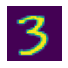

In [169]:
show_image(threes_tensors[1])

In [170]:
len(sevens_tensors)

6265

<AxesSubplot:>

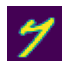

In [171]:
show_image(sevens_tensors[1])

Ora che la lista di tensori è costruita, andiamo a creare il nostro **rank-3 tensor**, cioè un *tensore a 3 dimensioni*(spazio vettoriale a 3 assi). 

Per fare questo, utilizziamo il metodo di pythorch torch.stack() a cui passiamo come argomento la lista di tensori appena costruita

In [172]:
stacked_threes = torch.stack(threes_tensors)
stacked_sevens = torch.stack(sevens_tensors)

Poiché successivamente faremo la media di tutti i nostri tensori, e poiché in pyThorch, l'operazione di media, richiede che i valori siano fload, procediamo a fare il casting in float dei nostri due tensori

In [210]:
stacked_threes = stacked_threes.float()
stacked_sevens = stacked_sevens.float()

Inoltre, per comodità, andiamo a normalizzare i dati tra 0 e 1

In [174]:
stacked_threes = stacked_threes/255

In [175]:
print("shape: " + str(stacked_threes.shape))
print("rank: " + str(stacked_threes.ndim))

shape: torch.Size([6131, 28, 28])
rank: 3


In [176]:
stacked_sevens = stacked_sevens/255

In [177]:
print("shape: " + str(stacked_sevens.shape))
print("rank: " + str(stacked_sevens.ndim))

shape: torch.Size([6265, 28, 28])
rank: 3


### Calcolo della media
A questo punto, possiamo preocedere calcolando la media di tutti i nostri tensori di 3 e 7. Quello che otterremo è un tensore che contiene il 3 medio tra tutti i 3 nel dataset e un tensore che contiene un 7 medio tra tutti i 7 nel dataset

Quando calcoliamo la media, specifichiamo 0 come argomento alla funzione mean, perché vogliamo scorrere l'asse 0, muovendoci su tutti i tensori 28x28 all'interno degli altri assi

In [178]:
stacked_threes_mean = stacked_threes.mean(0)
stacked_sevens_mean = stacked_sevens.mean(0)

<AxesSubplot:>

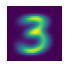

In [179]:
show_image(stacked_threes_mean)

<AxesSubplot:>

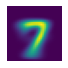

In [180]:
show_image(stacked_sevens_mean)

### Calcolo della differenza
A questo punto, una volta ottenuto le nostre immagini medie che rappresentano il nostro 3 ed il nostro 7, procediamo calcolando la differenza tra un'immagine random che abbiamo (3 o 7) e la nostra immagine media.

A livello concettuale, quello che dobbiamo fare è prendere la nostra immagine randomica (che non sappiamo essere un 3 oppure un 7) e fare la differenza sia con il nostro 3 medio che con il nostro 7 medio.

Otterremmo così 2 tensori, rappresentanti le differenze tra le imamgini, di questi tensori poi ne calcoliamo la media e andiamo a vedere quali delle due medie risulta essere più piccola.

Con buona probabilità, la media più piccola sarà quella associata all'immagine media che rappresenta la nostra immagine random.

Se facessimo però la semplice differenza tra due immagini, pixel per pixel, otterremo alcuni punti in cui alcuni pixel risulterebbero positivi e alcuni pixel risulterebbero negativi e questo avremme un impatto negativo sul calcolo della media finale.

**Abbiamo quindi due possibili viee:**

- Calcolare la media del valore assoluto delle singole differenze (pixel per pixel). Questa tecnica è chiamata **L1 Norm**
>
- Calcolare la media del quadrato delle singole differenze (pixel per pixel) e poi fare la radice quadrata di tutto. Questa tecnica è chiamata **L2 norm**


Iniziamo prendendo un 3 randomico e un 7 randomico

In [181]:
from random import randint
rand_3_index = randint(0, len(threes))
rand_7_index = randint(0, len(sevens))

rand_3 = stacked_threes[rand_3_index]
rand_7 = stacked_sevens[rand_7_index]

<AxesSubplot:>

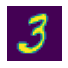

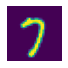

In [182]:
show_image(rand_3)
show_image(rand_7)

#### L1 Norm
Procediamo ora con il calcolo della differenza utilizzando la **L1 Norm**

In [183]:
dist_3rand_3mean_l1 = (rand_3 - stacked_threes_mean).abs().mean()
dist_7rand_3mean_l1 = (rand_7 - stacked_threes_mean).abs().mean()

dist_7rand_7mean_l1 = (rand_7 - stacked_sevens_mean).abs().mean()
dist_3rand_7mean_l1 = (rand_3 - stacked_sevens_mean).abs().mean()

In [184]:
print("L1 | 3rand e 3mean: " + str(dist_3rand_3mean_l1.item()))
print("L1 | 7rand e 3mean: " + str(dist_7rand_3mean_l1.item()))
print("---")
print("L1 | 7rand e 7mean: " + str(dist_7rand_7mean_l1.item()))
print("L1 | 3rand e 7mean: " + str(dist_3rand_7mean_l1.item()))

L1 | 3rand e 3mean: 0.1196458712220192
L1 | 7rand e 3mean: 0.13589568436145782
---
L1 | 7rand e 7mean: 0.08968070894479752
L1 | 3rand e 7mean: 0.15540942549705505


Come possiamo notare dai risultati sopra, utilizzando **L1 Norm** la differenza è minore quando compariamo un 3 randomico con il 3 medio e quando compariamo un 7 randomico con il 7 medio

#### L2 Norm
Procediamo ora con il calcolo della differenza utilizzando la **L2 Norm**

In [185]:
dist_3rand_3mean_l2 = ((rand_3 - stacked_threes_mean)**2).mean().sqrt()
dist_7rand_3mean_l2 = ((rand_7 - stacked_threes_mean)**2).mean().sqrt()

dist_7rand_7mean_l2 = ((rand_7 - stacked_sevens_mean)**2).mean().sqrt()
dist_3rand_7mean_l2 = ((rand_3 - stacked_sevens_mean)**2).mean().sqrt()

In [186]:
print("L2 | 3rand e 3mean: " + str(dist_3rand_3mean_l2.item()))
print("L2 | 7rand e 3mean: " + str(dist_7rand_3mean_l2.item()))
print("---")
print("L2 | 7rand e 7mean: " + str(dist_7rand_7mean_l2.item()))
print("L2 | 3rand e 7mean: " + str(dist_3rand_7mean_l2.item()))

L2 | 3rand e 3mean: 0.2175213098526001
L2 | 7rand e 3mean: 0.24617208540439606
---
L2 | 7rand e 7mean: 0.17407654225826263
L2 | 3rand e 7mean: 0.2989250421524048


## Calcolo dell'affidabilità

Come possiamo notare dai risultati sopra, utilizzando **L2 Norm** la differenza è minore quando compariamo un 3 randomico con il 3 medio e quando compariamo un 7 randomico con il 7 medio

A questo punto quindi, abbiamo trovato un metodo, **utilizzando solo operazioni sui vettori**, di capire se una immagine randomica è più vicina ad essere un 3 oppure ad essere un 7.

Adesso, per avere un riferimento chiaro sulla capacità del nostro sistema di distringuere 3 a 7, abbiamo necessità di trovare un modo di calcolare l'affidabilità.

Ovviamente, poiché abbiamo utilizzato i **dati di training** per calcolare le due immagini medie rappresentanti 3 e 7, andremo ad utilizzare i **dati di validation**, per andare a calcolare l'affidabilità del nostro sistema


Iniziamo quindi importando le immagini di validation

In [187]:
validation_threes = (path/'valid'/'3').ls().sorted()
validation_threes

(#1010) [Path('/home/simone/.fastai/data/mnist_sample/valid/3/1020.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1028.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1042.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1062.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1066.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1067.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1069.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1072.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1092.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/3/1095.png')...]

In [188]:
validation_sevens = (path/'valid'/'7').ls().sorted()
validation_sevens

(#1028) [Path('/home/simone/.fastai/data/mnist_sample/valid/7/0.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1006.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1012.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1021.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1039.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1055.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1071.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1091.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1096.png'),Path('/home/simone/.fastai/data/mnist_sample/valid/7/1100.png')...]

In [189]:
Image.open(validation_threes[1])

In [190]:
Image.open(validation_sevens[1])

Proseguiamo creando una lista di tensori contenenti 3 e 7

In [191]:
threes_valid_tensors = [ tensor(Image.open(img_path)) for img_path in validation_threes ]
sevens_valid_tensors = [ tensor(Image.open(img_path)) for img_path in validation_sevens ]

In [192]:
len(threes_valid_tensors)

1010

In [193]:
len(sevens_valid_tensors)

1028

E infine andiamo a creare i **3-rank tensor** (tensore a 3 dimensioni)

In [194]:
stacked_valid_threes = torch.stack(threes_valid_tensors)
stacked_valid_sevens = torch.stack(sevens_valid_tensors)

Come prima, ora procediamo a castare in float e normalizzare

In [195]:
stacked_valid_threes = stacked_valid_threes.float()/255
stacked_valid_sevens = stacked_valid_sevens.float()/255

<AxesSubplot:>

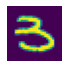

In [196]:
show_image(stacked_valid_threes[1])

<AxesSubplot:>

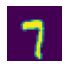

In [197]:
show_image(stacked_valid_sevens[1])

Osservando la shape dei tensori creati, vediamo che correttamente abbiamo a che fare con un unico tensore tridimensionale, con una dimensione più ampia che rappresenta l'insieme delle immagini 28x28. Le altre due dimensioni avranno quindi una lunghezza di 28 e 28

In [198]:
stacked_valid_threes.shape, stacked_valid_sevens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

#### Calcoliamo l'affidabilità del nostro sistema

Procediamo creando delle funzioni, che saranno utilizzate per calcolare la L1 Norm (o L2 Norm) tra le immagini (tensori) di validation e i nostri riferimenti medi.

Prima infatti, abbiamo fatto il calcolo su un solo 3 e un solo 7 randomico. 

Per calcolare l'affidabilità però, ovviamente, abbiamo bisogno di farlo su tutto il frammento di validation del nostro dataset. 

A questo scopo definiamo le funzioni a supporto
**
Utilizzeremo il calcolo dell'affidabilità tramite **L1 Norm**, ma lo stesso può essere fatto con **L2 Norm**

In [199]:
def l1_norm_difference_calculator(validation_image, mean_image):
    
    return (validation_image - mean_image).abs().mean( (-1, -2) )

**NOTA:** Mentre nel caso precedente avevamo *(a-b).abs().mean()*, adesso abbiamo *(a-b).abs().mean(-1, -2)*

Questo perché prima, a e b erano due singoli tensori rappresentanti l'immagine randomica e l'immagine media.

In questo caso però a è un insieme di tensori rappresentanti tutte le immagini di validation del dataset e b è l'immagine media ripetuta da PyTorch tramite broacasting in tante occorrenze quante sono le immagini nel validation.

Bisogna quindi specificare su quali assi vogliamo calcolare la media e, nel nostro caso sono l'ultimo e il penultimo asse, che rappresentano appunto l'immagine 28x28

Allo stesso modo quindi, mentre prima ottenevamo un sigolo risultato da l1 norm, in questo caso otteniamo un tensore di risultati, contenenti tante medie quante saranno le comparazioni che verranno fatte e quindi, quante sono le immagini di validation del dataset.

In questo modo avremmo un risultato della media della differenza, non per una immagine, ma per tutte le immagini di validation

Ovviamente se chiamiamo la funzione, non con lista di imamgini, ma con una sola immagine, otterremo come risultato un unico tensore rappresentante il risultato della l1 norm, tra le due immagini.

E ovviamente, chiamando la funzione con le stesse due immagini utilizzate nel calcolo precentente, otterremo lo stesso risultato.

In [200]:
rand_3.shape, stacked_threes_mean.shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [201]:
tmp = l1_norm_difference_calculator(rand_3, stacked_threes_mean)
tmp

tensor(0.1196)

Proviamo invece ora a fare lo stesso calcolo, con un insieme di immagini e vediamo che otteniamo più risultati 

In [202]:
stacked_valid_threes.shape, stacked_threes_mean.shape

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

In [203]:
tmp = l1_norm_difference_calculator(stacked_valid_threes, stacked_threes_mean)
tmp

tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260])

Una volta creata la nostra funzione per calcolora la distanza in L1 Norm, andiamo a definire una funzione per stabilire se una data cifra viene classificato o meno come 3 dal nostro sistema

In [204]:
def is_3(x):
    return l1_norm_difference_calculator(x, stacked_threes_mean) < l1_norm_difference_calculator(x, stacked_sevens_mean)

Adesso, chiamando la funzione con il nostro insieme di 3 di validation, otterremmo una lista di True o False a seconda del fatto che la nostra L1 Norm calcolata sul 3 medio sia minore o maggiore della L1 Norm calcolata sul 7 medio

In [205]:
is_3_results = is_3(stacked_valid_threes)
is_3_results

tensor([ True,  True,  True,  ..., False,  True,  True])

E per ottenere un risultato su cui possiamo operare, andiamo a convertire questo tensore di boolean in un tensore di Float (True:1 e False:0)

In [206]:
is_3_results = is_3_results.float()
is_3_results

tensor([1., 1., 1.,  ..., 0., 1., 1.])

E infine, per calcolare l'accuracy, basta calcolarne la media per ottenere la percentuale di 3 che sono stati correttamente considerati tali

In [207]:
is_3_accuracy = is_3_results.mean()
is_3_accuracy

tensor(0.9168)

E ora possiamo calcolare l'accuracy sul 7, come 1 - l'accuracy ottenuta con is_3 passandogli il validation set dei 7

In [208]:
is_7_accuracy = 1 - is_3(stacked_valid_sevens).float().mean()
is_7_accuracy

tensor(0.9854)

E per concludere possiamo calcolare l'accuracy media come la media delle due accuracy sopra

In [209]:
system_accuracy = (is_3_accuracy + is_7_accuracy)/2
system_accuracy

tensor(0.9511)

**95% NOT BAD!**
-
95% a questo punto è il nostro benchmark. Sappiamo che calcolando un'immagine media, data dalla media di tutte le immagini nel train set e valutando l'accuracy sul validation set, otteniamo un'accuracy complessiva del 95%.

